In [3]:
import pandas as pd
bank=pd.read_csv("bank_transactions.csv")
bank.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Type,Amount,Location,Fraud_Flag
0,T1001,C140,2024-01-01,Debit,1661.73,Miami,0
1,T1002,C106,2024-01-02,Debit,1300.09,Chicago,0
2,T1003,C134,2024-01-03,Credit,2635.24,Houston,0
3,T1004,C189,2024-01-04,Credit,2731.78,Houston,0
4,T1005,C139,2024-01-05,Debit,1254.46,Los Angeles,0


In [5]:
bank = bank.drop(columns=['Fraud_Flag'])
bank.head()

,Transaction_ID,Customer_ID,Transaction_Date,Transaction_Type,Amount,Location
0,T1001,C140,2024-01-01,Debit,1661.73,Miami
1,T1002,C106,2024-01-02,Debit,1300.09,Chicago
2,T1003,C134,2024-01-03,Credit,2635.24,Houston
3,T1004,C189,2024-01-04,Credit,2731.78,Houston
4,T1005,C139,2024-01-05,Debit,1254.46,Los Angeles


In [7]:
import pandas as pd
data=pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
col = data['Survived']
col

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
numerical_cols=data.select_dtypes(include=['number'])
#print(numerical_cols.head())
y=numerical_cols['Survived']
x=numerical_cols.drop(columns='Survived',axis=1)
#print(x.head())
x.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000


In [17]:
x.corr().round(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.04,0.04,-0.06,-0.00,0.01
Pclass,-0.04,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,-0.55,0.10,0.16,0.22,1.00


<Axes: >

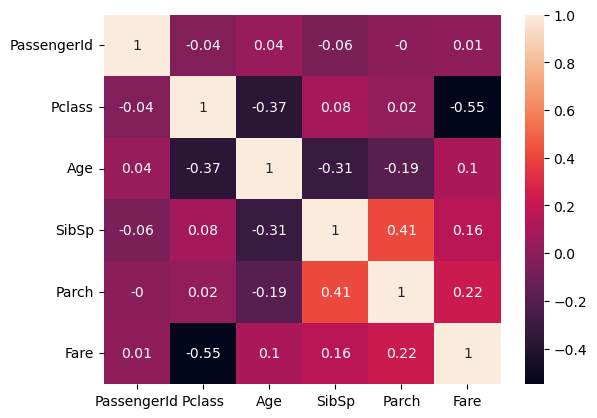

In [21]:
import seaborn as sns
sns.heatmap(x.corr().round(2),annot=True)

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Creating the dataset
df = {'Difficulty': ['Easy', 'Medium', 'Hard', 'Medium','Easy'],
      'Test Score': [85, 75, 90,75,90]}  # Added a 'Test Score' column for correlation

df1 = pd.DataFrame(df)

# Encoding the 'Difficulty' column
encoder = LabelEncoder()
df1['Difficulty_encoded'] = encoder.fit_transform(df1['Difficulty'])

# Printing the updated DataFrame
print(df1)

# Calculating correlation
correlation = df1['Difficulty_encoded'].corr(df1['Test Score'])
print("Correlation:", correlation)


  Difficulty  Test Score  Difficulty_encoded
0       Easy          85                   0
1     Medium          75                   2
2       Hard          90                   1
3     Medium          75                   2
4       Easy          90                   0
Correlation: -0.8242255917447338


In [28]:
import pandas as pd

data = {'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red'],
        'Test Score': [50, 60, 70, 80, 90]}
df1 = pd.DataFrame(data)
df_encoded = pd.get_dummies(df1, columns=['Color'])
print(df_encoded)

correlation = df_encoded['Color_Red'].corr(df_encoded['Test Score'])
print("\nCorrelation with Red:", correlation)


   Test Score  Color_Blue  Color_Green  Color_Red
0          50       False        False       True
1          60        True        False      False
2          70       False         True      False
3          80        True        False      False
4          90       False        False       True

Correlation with Red: -1.2819751242557094e-17
